# Customer Segmentation using K-Mean

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
stor_df = pd.read_csv(r"D:\Data Science\github\Customer-Segmentation-for-a-Retail-Business\data\raw\store.csv")

In [171]:
stor_df.head(3)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,sales_year
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011


## RFM (Recency, Frequency, Monetary)

In [172]:
from datetime import datetime

In [173]:
stor_df['order_date'] = pd.to_datetime(stor_df['order_date'])

In [174]:
reference_date = stor_df['order_date'].max() + pd.Timedelta(days=1)

In [175]:
rfm = stor_df.groupby('customer_id').agg({
    'order_date': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'nunique',                                    # Frequency
    'sales': 'sum',                                           # Monetary (sales)
    'profit': 'sum'                                           # Monetary (profit)
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary_Sales', 'Monetary_Profit']

In [176]:
rfm.sort_values("Monetary_Sales", ascending=False).head()

,CustomerID,Recency,Frequency,Monetary_Sales,Monetary_Profit
1463,TA-21385,19,25,35668.12080,6274.98910
623,GT-14710,9,30,34471.89028,5164.84718
1489,TC-20980,54,28,34218.26900,8787.47490
1405,SM-20320,74,21,31125.29496,-1083.67434
237,BW-11110,60,35,30613.61650,3337.46590


In [177]:
rfm.sort_values("Monetary_Profit", ascending=False).head()

,CustomerID,Recency,Frequency,Monetary_Sales,Monetary_Profit
1489,TC-20980,54,28,34218.26900,8787.47490
1243,RB-19360,50,25,29197.63460,8523.95150
1353,SC-20095,76,28,25602.61000,8106.21790
150,BE-11335,36,37,27158.01840,7790.69630
656,HL-15040,24,20,29664.23058,7657.50178


In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
features = rfm[['Recency', 'Frequency', 'Monetary_Sales', 'Monetary_Profit']]

In [180]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(features)

In [181]:
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=features.columns)
rfm_scaled_df.head()

,Recency,Frequency,Monetary_Sales,Monetary_Profit
0,-0.622788,0.264053,0.835857,-0.357866
1,-0.638432,0.640847,-0.298089,-0.184831
2,0.229843,0.358251,1.405218,0.446954
3,-0.481986,1.865430,1.066083,1.602818
4,-0.669722,-0.866332,-0.823144,-0.291694


In [182]:
from sklearn.cluster import KMeans

c:\Users\alire\.conda\envs\TF2\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\alire\.conda\envs\TF2\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\alire\.conda\envs\TF2\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\alire\.conda\envs\TF2\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have

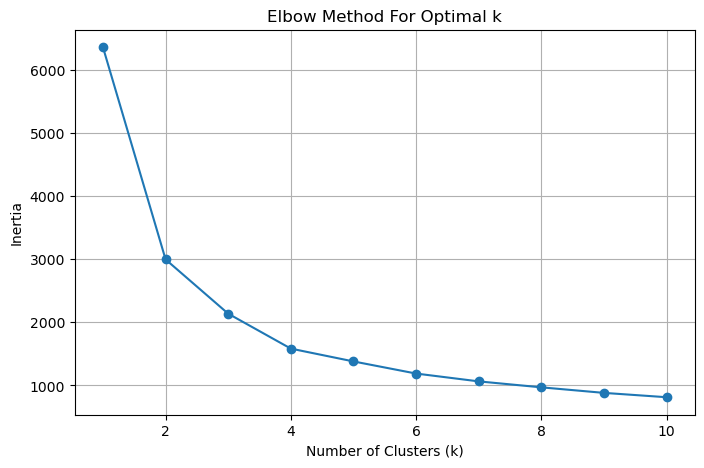

In [183]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [184]:
k = 4 
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

c:\Users\alire\.conda\envs\TF2\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [185]:
print(rfm.dtypes)
rfm.head()

CustomerID          object
Recency              int64
Frequency            int64
Monetary_Sales     float64
Monetary_Profit    float64
Cluster              int32
dtype: object


,CustomerID,Recency,Frequency,Monetary_Sales,Monetary_Profit,Cluster
0,AA-10315,9,19,13747.41300,447.69050,2
1,AA-10375,7,23,5884.19500,677.47740,2
2,AA-10480,118,20,17695.58978,1516.47518,2
3,AA-10645,27,36,15343.89070,3051.43900,1
4,AA-315,3,7,2243.25600,535.56600,0


In [186]:
cluster_profile = rfm.groupby('Cluster')[
    ['Recency', 'Frequency', 'Monetary_Sales', 'Monetary_Profit']
].mean().round(2)

print(cluster_profile)

         Recency  Frequency  Monetary_Sales  Monetary_Profit
Cluster                                                     
0          85.00       7.00         2290.69           174.76
1          30.25      28.87        18883.96          3214.82
2          32.59      25.18        12002.06          1099.61
3         433.53       4.41         1574.51           146.99


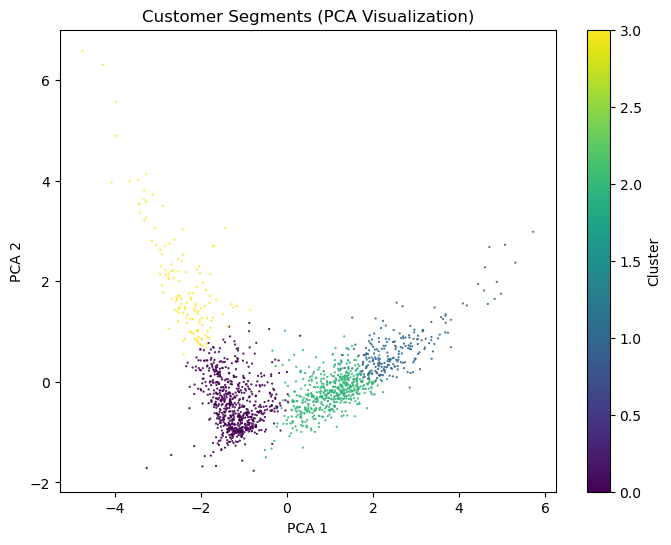

In [187]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c=rfm['Cluster'], cmap='viridis', s=0.3)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segments (PCA Visualization)')
plt.colorbar(label='Cluster')
plt.show()